In [5]:
import pandas as pd
import numpy as np

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import KBinsDiscretizer
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [8]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Age       714 non-null    float64
 2   Fare      891 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 21.0 KB


In [10]:
df.dropna(inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  714 non-null    int64  
 1   Age       714 non-null    float64
 2   Fare      714 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 22.3 KB


In [12]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [13]:
X = df.iloc[:,1:3]
y = df.iloc[:,0]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [15]:
X_train.shape

(571, 2)

In [16]:
X_test.shape

(143, 2)

In [17]:
clf = DecisionTreeClassifier()

In [18]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [19]:
accuracy_score(y_pred,y_test)

0.6293706293706294

In [20]:
np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy'))

0.6344874804381846

In [21]:
kbin_age = KBinsDiscretizer(n_bins=5,encode='ordinal',strategy='quantile')
kbin_fare = KBinsDiscretizer(n_bins=5,encode='ordinal',strategy='quantile')

In [22]:
trf = ColumnTransformer([
    ('first',kbin_age,[0]),
    ('second',kbin_fare,[1])
])

In [23]:
X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.transform(X_test)

In [24]:
trf.named_transformers_['first'].bin_edges_

array([array([ 0.42, 19.  , 25.  , 32.  , 42.  , 80.  ])], dtype=object)

In [25]:
trf.named_transformers_['second'].bin_edges_

array([array([  0.    ,   7.8958,  13.    ,  26.    ,  51.4792, 512.3292])],
      dtype=object)

In [26]:
output = pd.DataFrame({
    'age':X_train['Age'],
    'age_trf':X_train_trf[:,0],
    'fare':X_train['Fare'],
    'fare_trf':X_train_trf[:,1]
})

In [27]:
output['age_labels'] = pd.cut(x=X_train['Age'],
                             bins=trf.named_transformers_['first'].bin_edges_[0].tolist())
output['fare_labels'] = pd.cut(x=X_train['Fare'],
                             bins=trf.named_transformers_['second'].bin_edges_[0].tolist())

In [28]:
output.sample(5)

,age,age_trf,fare,fare_trf,age_labels,fare_labels
675,18.0,0.0,7.775,0.0,"(0.42, 19.0]","(0.0, 7.896]"
311,18.0,0.0,262.375,4.0,"(0.42, 19.0]","(51.479, 512.329]"
575,19.0,1.0,14.500,2.0,"(0.42, 19.0]","(13.0, 26.0]"
734,23.0,1.0,13.000,2.0,"(19.0, 25.0]","(7.896, 13.0]"
706,45.0,4.0,13.500,2.0,"(42.0, 80.0]","(13.0, 26.0]"


In [29]:
clf = DecisionTreeClassifier()
clf.fit(X_train_trf,y_train)
y_pred2 = clf.predict(X_test_trf)

In [30]:
accuracy_score(y_test,y_pred2)

0.6433566433566433

In [31]:
X_trf = trf.fit_transform(X)
np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy'))

0.6247261345852895

In [32]:
def discretize(bins,strategy):
    kbin_age = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    kbin_fare = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    
    trf = ColumnTransformer([
        ('first',kbin_age,[0]),
        ('second',kbin_fare,[1])
    ])
    
    X_trf = trf.fit_transform(X)
    print(np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy')))
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Age'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_trf[:,0],color='red')
    plt.title("After")

    plt.show()
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Fare'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_trf[:,1],color='red')
    plt.title("Fare")

    plt.show()

0.6415101721439749


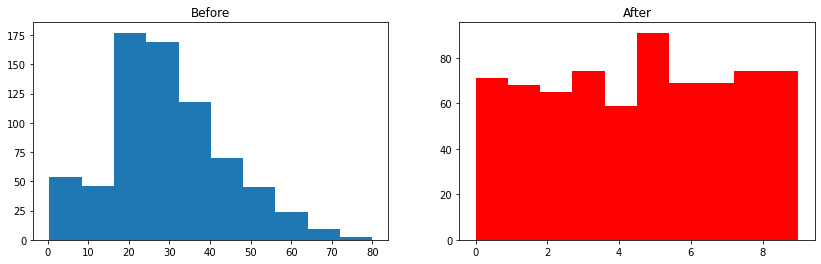

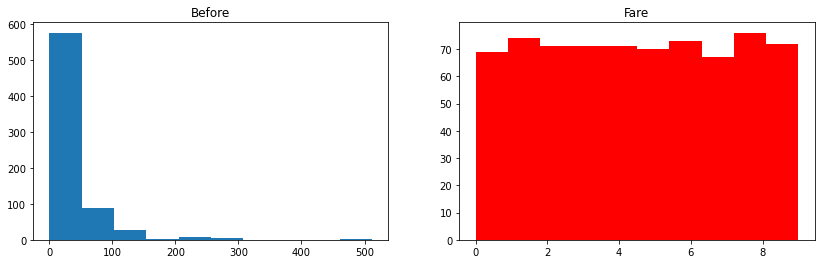

In [33]:
discretize(10,'quantile')